![image.png](attachment:image.png)

##### **Good luck with taking your exam. Keep working and make your dreams all come true. Seeing the results of all of your hard work will make this struggle worth it. We’re all thinking of you.** 
<b><font color='blue'>AI-PRO Spark Team ITI</font></b>

## Objective:
- The objective from this project is to create a <b>Logistic Regression Classifier</b> to predict the <b>Stroke Condition</b>.
- <b>Stoke</b> is a condition in which either the blood flow to the brain stops or blood flow is excessive.
- It is required to obtain <b>ROC > 0.65</b>.

### Data:
- Data is provided in csv format in a file named <b>healthcare-dataset-stroke-data.csv</b>

### Column names and data types are as follow:
- id, integer.
- gender, string.
- age, double.
- hypertension, integer.
- heart_disease, integer.
- ever_married, string.
- work_type, string.
- Residence_type, string.
- avg_glucose_level, double.
- bmi, double.
- smoking_status, string.
- stroke, integer <b>(Target Label)</b>.
If the person has stroke the stroke label value is <b>"1"</b> otherwise <b>"0"</b>.

In [3]:
!pip install findspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 53 kB/s 
     |████████████████████████████████| 199 kB 67.9 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=a01ec300ef0bb275a8cdcb102bcd879b6f5c97fbea0b571fe7b6c659e7268f92
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


## To perform this task follow the following guiding steps:

### Create a spark session and import the required libraries

In [192]:
import pyspark

In [193]:
from pyspark.sql import SparkSession
import findspark
findspark.init()

In [194]:
import pyspark.sql.functions as f
from pyspark.sql.types import *
import numpy as np

In [195]:
spark = SparkSession.builder.appName("FinalExam").getOrCreate()

### Create a data schema programatically

id, integer.
gender, string.
age, double.
hypertension, integer.
heart_disease, integer.
ever_married, string.
work_type, string.
Residence_type, string.
avg_glucose_level, double.
bmi, double.
smoking_status, string.
stroke, integer (Target Label). If the person has stroke the stroke label value is "1" otherwise "0".

In [196]:
schema = StructType([StructField("id", IntegerType(), False),
                     StructField("gender", StringType(), False),
                     StructField("age", DoubleType(), False),
                     StructField("hypertension", IntegerType(), False),
                     StructField("heart_disease", IntegerType(), False),
                     StructField("ever_married", StringType(), False),
                     StructField("work_type", StringType(), False),
                     StructField("Residence_type", StringType(), False),
                     StructField("avg_glucose_level", DoubleType(), False),
                     StructField("bmi", DoubleType(), False),
                     StructField("smoking_status", StringType(), False),
                     StructField("stroke", IntegerType(), False) , ])

### Read the data using the standard DataReader (Key,Value) pairs format
- Provide the schema and any other required options.

In [197]:
df = spark.read.csv('healthcare-dataset-stroke-data.csv' ,header=True , schema= schema)

### Explore the data 
#### You have to do the following:
- Print the Schema.
- Show the first 10 rows from the data.
- Explore null values and show how many null values in each column.
- Plot a count plot for the target label and <b>notice the graph</b>.
- Perform any additional EDA you find useful.

## Print Schema

In [198]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: string (nullable = true)
 |-- stroke: integer (nullable = true)



## Show the first 10 rows of df

In [199]:
df.show(10)

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
| 9046|  Male|67.0|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|formerly smoked|     1|
|51676|Female|61.0|           0|            0|         Yes|Self-employed|         Rural|           202.21|null|   never smoked|     1|
|31112|  Male|80.0|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|   never smoked|     1|
|60182|Female|49.0|           0|            0|         Yes|      Private|         Urban|           171.23|34.4|         smokes|     1|
| 1665|Female|79.0|           1|            0|         

## Checking the nulls

In [200]:
from pyspark.sql.functions import col,isnan,when,count,isnull

In [201]:
df.select([count(when(isnull(c), c)).alias(c) for c in df.columns]).show()

+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
| id|gender|age|hypertension|heart_disease|ever_married|work_type|Residence_type|avg_glucose_level|bmi|smoking_status|stroke|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
|  0|     0|  0|           0|            0|           0|        0|             0|                0|201|             0|     0|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+



## Plot a count plot for the target label

In [202]:
groupdf = df.groupBy('stroke').count().toPandas()

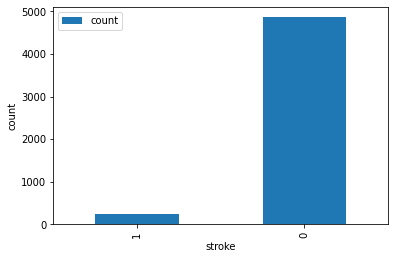

In [203]:
groupdf.plot(kind='bar', x='stroke', y='count' ,xlabel = 'stroke' , ylabel = 'count')

### Get the summary statistics of the age column
- You will find the minimum age is about <b>0.08</b>.
- Remove rows for the age below <b>2 years old</b>.

In [204]:
df.describe('age').show()

+-------+------------------+
|summary|               age|
+-------+------------------+
|  count|              5110|
|   mean|43.226614481409015|
| stddev| 22.61264672311348|
|    min|              0.08|
|    max|              82.0|
+-------+------------------+



In [205]:
df = df.filter(df['age'] >= 2)
df.describe('age').show()

+-------+------------------+
|summary|               age|
+-------+------------------+
|  count|              4990|
|   mean| 44.23907815631262|
| stddev|21.908077881917443|
|    min|               2.0|
|    max|              82.0|
+-------+------------------+



### Working with gender & smoking_status columns:
- Select and show the gender & smoking_status columns
- Get the distinct values for each column.

In [206]:
df.select('gender', 'smoking_status').show(20)

+------+---------------+
|gender| smoking_status|
+------+---------------+
|  Male|formerly smoked|
|Female|   never smoked|
|  Male|   never smoked|
|Female|         smokes|
|Female|   never smoked|
|  Male|formerly smoked|
|  Male|   never smoked|
|Female|   never smoked|
|Female|        Unknown|
|Female|        Unknown|
|Female|   never smoked|
|Female|         smokes|
|Female|         smokes|
|  Male|        Unknown|
|Female|   never smoked|
|Female|   never smoked|
|  Male|         smokes|
|  Male|         smokes|
|Female|   never smoked|
|  Male|        Unknown|
+------+---------------+
only showing top 20 rows



In [207]:
df.select('gender').distinct().show()

+------+
|gender|
+------+
|Female|
| Other|
|  Male|
+------+



In [208]:
df.select('smoking_status').distinct().show()

+---------------+
| smoking_status|
+---------------+
|         smokes|
|        Unknown|
|   never smoked|
|formerly smoked|
+---------------+



#### Change the string values of the columns into numerical values as follow:
1. Gender column:
    * Male = 1 
    * Female = 0 
    * Other = 0 
2. Smoking Status column:
  * never smoked = 0
  * Unknown = 0.5
  * formerly smoked = 0.75
  * smokes = 1.0


In [209]:
def GenderToNum(gender1):
  if gender1 == 'Male':
    return 1
  elif gender1 == 'Female':
    return 0
  elif gender1 =='Other':
    return 0

def SmokeToNum(smoke):
  if smoke == 'never smoked':
    return 0.0
  elif smoke == 'Unknown':
    return 0.5
  elif smoke =='formerly smoked':
    return 0.75
  elif smoke =='smokes':
    return 1.0

In [210]:
genderconversion = f.udf(lambda x: GenderToNum(x), IntegerType())
df = df.withColumn('gender', genderconversion(f.col("gender")))
smokingconversion = f.udf(lambda x: SmokeToNum(x), DoubleType())
df = df.withColumn('smoking_status', smokingconversion(f.col("smoking_status")))

In [211]:
df.show(2)

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+--------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi|smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+--------------+------+
| 9046|     1|67.0|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|          0.75|     1|
|51676|     0|61.0|           0|            0|         Yes|Self-employed|         Rural|           202.21|null|           0.0|     1|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+--------------+------+
only showing top 2 rows



#### Show the output DataFrame
- Select and show the gender & smoking_status columns after value changing.
- Print schema for the new dataframe.

In [212]:
df.select('gender', 'smoking_status').show(20)

+------+--------------+
|gender|smoking_status|
+------+--------------+
|     1|          0.75|
|     0|           0.0|
|     1|           0.0|
|     0|           1.0|
|     0|           0.0|
|     1|          0.75|
|     1|           0.0|
|     0|           0.0|
|     0|           0.5|
|     0|           0.5|
|     0|           0.0|
|     0|           1.0|
|     0|           1.0|
|     1|           0.5|
|     0|           0.0|
|     0|           0.0|
|     1|           1.0|
|     1|           1.0|
|     0|           0.0|
|     1|           0.5|
+------+--------------+
only showing top 20 rows



### Deal with null value according to your data analysis.

In [217]:
df2 = df.agg(f.mean('bmi')).collect()[0][0]
df2

29.140855057351413

In [218]:
df.describe('bmi').show()

+-------+------------------+
|summary|               bmi|
+-------+------------------+
|  count|              4795|
|   mean|29.140855057351413|
| stddev| 7.765248721877016|
|    min|              11.3|
|    max|              97.6|
+-------+------------------+



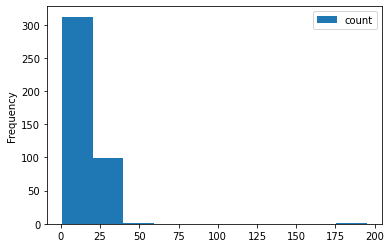

In [219]:
df.groupBy('bmi').count().toPandas().plot(kind='hist', x='bmi')
#skewness to the right

In [119]:
# df2 = df["bmi"].mean()
# df2

In [220]:
df.describe('bmi').show()

+-------+------------------+
|summary|               bmi|
+-------+------------------+
|  count|              4795|
|   mean|29.140855057351413|
| stddev| 7.765248721877016|
|    min|              11.3|
|    max|              97.6|
+-------+------------------+



In [221]:
df = df.na.fill(df2, subset=['bmi'])

In [222]:
df.show()

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+------------------+--------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level|               bmi|smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+------------------+--------------+------+
| 9046|     1|67.0|           0|            1|         Yes|      Private|         Urban|           228.69|              36.6|          0.75|     1|
|51676|     0|61.0|           0|            0|         Yes|Self-employed|         Rural|           202.21|29.140855057351413|           0.0|     1|
|31112|     1|80.0|           0|            1|         Yes|      Private|         Rural|           105.92|              32.5|           0.0|     1|
|60182|     0|49.0|           0|            0|         Yes|      Private|         Urban|           171.23|      

In [223]:
df.select([count(when(isnull(c), c)).alias(c) for c in df.columns]).show()

+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
| id|gender|age|hypertension|heart_disease|ever_married|work_type|Residence_type|avg_glucose_level|bmi|smoking_status|stroke|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
|  0|     0|  0|           0|            0|           0|        0|             0|                0|  0|             0|     0|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+



### Split the data into training and test dataframes:
- 80% training and 20% test.
- seed = 42.
- Save each dataframe as a parquet file

In [285]:
df_train, df_test = df.randomSplit([0.8, 0.2], seed = 42)

### Read the saved Train and Test DataFrame:
- Use the dataframes you read in the subsequent steps.

In [286]:
df.write.parquet("datasets1/train.parquet")
df.write.parquet("datasets1/test.parquet")

In [287]:
print(f"There are {df_train.count()} rows in the training set, and {df_test.count()} in the test set")

There are 4037 rows in the training set, and 953 in the test set


### Create the model:
- Perform feature engineering steps.
- Create the logistic regression classifier.
- Build the pipeline model that uses all feature engineering steps and the model.
- Train the pipeline model using the trainig dataset.

In [288]:
df_train = df_train.drop('id')
df_test = df_test.drop('id')

In [289]:
cat_cols = [field for (field, dataType) in df_train.dtypes
                  if dataType == 'string']
cat_cols

['ever_married', 'work_type', 'Residence_type']

In [290]:
index_cols = [x + "_Index" for x in cat_cols]
index_cols

['ever_married_Index', 'work_type_Index', 'Residence_type_Index']

In [291]:
oheOutputCols = [x + "_OHE" for x in cat_cols]
oheOutputCols

['ever_married_OHE', 'work_type_OHE', 'Residence_type_OHE']

In [292]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator,BinaryClassificationEvaluator
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.pipeline import Pipeline
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.feature import VectorAssembler , Imputer

In [293]:
vector_input=index_cols+oheOutputCols

In [294]:
stringIndexer = StringIndexer(inputCols=cat_cols,
                             outputCols=index_cols,
                             handleInvalid='skip')
oheEncoder = OneHotEncoder(inputCols=index_cols,
                          outputCols=oheOutputCols)

vector_assembler = VectorAssembler(inputCols=vector_input,
                                   outputCol="features")

In [295]:
numericCols = [field for (field,dataType) in df_train.dtypes
              if (((dataType=='double') | (dataType=='int')) & (field!='stroke') )]
numericCols

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

In [296]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline

In [297]:
lr = LogisticRegression(featuresCol = 'features', labelCol = 'stroke', maxIter=20)

In [298]:
pipeline =Pipeline(stages = [stringIndexer, oheEncoder, vector_assembler, lr])

In [299]:
pipeline_model = pipeline.fit(df_train)

### Perform predictions on tests dataframe:
- Test the model using the test dataframe
- Select and show the feature column.
- Print the schema of the output dataframe.
- Select and show both prediction and label columns.
- Explore the results for the label column stroke=1. i.e. select both columns (prediction,stroke) for stroke=1.<b>notice the result.</b> 
- Count the predicted 1 and 0 values.<b>notice the result.</b>   

In [300]:
df_predict = pipeline_model.transform(df_test)

In [301]:
df_predict.select('features').show(truncate=False)

+-------------------------------+
|features                       |
+-------------------------------+
|(9,[3,4,8],[1.0,1.0,1.0])      |
|(9,[0,4,8],[1.0,1.0,1.0])      |
|(9,[2,3,4],[1.0,1.0,1.0])      |
|(9,[2,3,4],[1.0,1.0,1.0])      |
|(9,[3,4,8],[1.0,1.0,1.0])      |
|(9,[2,3,4],[1.0,1.0,1.0])      |
|(9,[1,2,3,5],[1.0,1.0,1.0,1.0])|
|(9,[1,3,5,8],[1.0,1.0,1.0,1.0])|
|(9,[0,1,2,7],[1.0,3.0,1.0,1.0])|
|(9,[2,3,4],[1.0,1.0,1.0])      |
|(9,[1,2,3,6],[2.0,1.0,1.0,1.0])|
|(9,[0,2,4],[1.0,1.0,1.0])      |
|(9,[0,2,4],[1.0,1.0,1.0])      |
|(9,[1,2,3,5],[1.0,1.0,1.0,1.0])|
|(9,[2,3,4],[1.0,1.0,1.0])      |
|(9,[1,3,6,8],[2.0,1.0,1.0,1.0])|
|(9,[0,4,8],[1.0,1.0,1.0])      |
|(9,[3,4,8],[1.0,1.0,1.0])      |
|(9,[1,3,6,8],[2.0,1.0,1.0,1.0])|
|(9,[0,4,8],[1.0,1.0,1.0])      |
+-------------------------------+
only showing top 20 rows



In [302]:
df_predict.printSchema()

root
 |-- gender: integer (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = false)
 |-- smoking_status: double (nullable = true)
 |-- stroke: integer (nullable = true)
 |-- ever_married_Index: double (nullable = false)
 |-- work_type_Index: double (nullable = false)
 |-- Residence_type_Index: double (nullable = false)
 |-- ever_married_OHE: vector (nullable = true)
 |-- work_type_OHE: vector (nullable = true)
 |-- Residence_type_OHE: vector (nullable = true)
 |-- features: vector (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = false)



In [303]:
df_predict.select('stroke','prediction').where(df_predict['stroke'] == 1).show()

+------+----------+
|stroke|prediction|
+------+----------+
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
+------+----------+
only showing top 20 rows



In [304]:
df_predict.groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|       0.0|  953|
+----------+-----+



### Evaluate the model performance
- Use <b>BinaryClassificationEvaluator</b>. This will calculate the <b>ROC</b>.
- Set the parameters as follow:
    - <b>rawPredictionCol='prediction'</b> and <b>labelCol='stroke'</b>

In [305]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [306]:
evaluatorROC = BinaryClassificationEvaluator(rawPredictionCol='prediction'
                                             ,labelCol='stroke')

In [307]:
evaluatorROC.evaluate(df_predict)

0.5

### Improve Model Performance
- You may noticed that <b>the target label is imbalanced</b>.
- LogisticRegression classifier has a special parameter <b>weightCol</b> to deal with imbalanced class.
- In order to use this parameter you must have a <b>weightCol</b> in your training dataframe.
- In order to create this column you will need to define a <b>UDF</b> and apply it to the target label column.
- Create a LogisticRegression classifier with <b>weightCol</b> parameter.
- Build and train a pipeline model with the new LogisticRegression.
- Perform the prediction on the test dataframe. 
- Select and show both prediction and label columns.
- Explore the results for the label column stroke=1. i.e. select both columns (prediction,stroke) for stroke=1.<b>notice the result.</b> 
- Count the predicted 1 and 0 values.<b>notice the result.</b>   
- Evaluate the model performance exactly as in the previous step.
### YOU SHOULD OBTAIN  ROC > 0.65
<BR>
<b><font color='red'>Note: feel free to deal with the imbalanced cluster with the above method or another. However, you can only use methods applied on SPARK DATAFRAME</font></b>

In [308]:
ratio = df.where(df['stroke'] == 0).count() / df.count()
ratio

0.9503006012024048

In [309]:
def weight_balance(labels):
    return f.when(labels == 1, ratio).otherwise(1*(1-ratio))

train = df_train.withColumn('weightCol', weight_balance(f.col('stroke')))
test = df_test.withColumn('weightCol', weight_balance(f.col('stroke')))

In [310]:
train.select('stroke', 'weightCol').show(20)

+------+-------------------+
|stroke|          weightCol|
+------+-------------------+
|     0|0.04969939879759522|
|     0|0.04969939879759522|
|     0|0.04969939879759522|
|     0|0.04969939879759522|
|     0|0.04969939879759522|
|     0|0.04969939879759522|
|     0|0.04969939879759522|
|     0|0.04969939879759522|
|     0|0.04969939879759522|
|     0|0.04969939879759522|
|     1| 0.9503006012024048|
|     0|0.04969939879759522|
|     0|0.04969939879759522|
|     0|0.04969939879759522|
|     0|0.04969939879759522|
|     0|0.04969939879759522|
|     0|0.04969939879759522|
|     0|0.04969939879759522|
|     0|0.04969939879759522|
|     0|0.04969939879759522|
+------+-------------------+
only showing top 20 rows



In [311]:
lr2 = LogisticRegression(featuresCol = 'features', labelCol = 'stroke', weightCol='weightCol' , maxIter= 15)

In [312]:
pipeline =Pipeline(stages = [stringIndexer, oheEncoder, vector_assembler, lr2])

In [313]:
pipeline_model = pipeline.fit(train)

In [314]:
df_predict = pipeline_model.transform(test)

In [315]:
evaluatorROC.evaluate(df_predict)

0.6176477637697138

In [316]:
df_predict.select('stroke','prediction').show()

+------+----------+
|stroke|prediction|
+------+----------+
|     0|       1.0|
|     0|       0.0|
|     0|       1.0|
|     0|       1.0|
|     0|       1.0|
|     0|       1.0|
|     0|       1.0|
|     1|       1.0|
|     0|       0.0|
|     0|       1.0|
|     0|       1.0|
|     1|       0.0|
|     0|       0.0|
|     0|       1.0|
|     0|       1.0|
|     0|       1.0|
|     0|       0.0|
|     0|       1.0|
|     0|       1.0|
|     0|       0.0|
+------+----------+
only showing top 20 rows



In [317]:
df_predict.select('stroke','prediction').where(df_predict['stroke'] == 1).show()

+------+----------+
|stroke|prediction|
+------+----------+
|     1|       1.0|
|     1|       0.0|
|     1|       0.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       0.0|
|     1|       1.0|
|     1|       1.0|
+------+----------+
only showing top 20 rows



In [318]:
df_predict.groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|       0.0|  317|
|       1.0|  636|
+----------+-----+



In [319]:
evaluatorROC.evaluate(df_predict)

0.6176477637697138

# GOOD LUCK
<b><font color='GREEN'>AI-PRO Spark Team ITI</font></b>

![image-3.png](attachment:image-3.png)